<a href="https://colab.research.google.com/github/mac-v/machine-learning-udemy/blob/main/ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'1.2.2'

# Preparing data

In [3]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [4]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [5]:
for col in ['size', 'color', 'gender', 'bought']:
  df[col]  = df[col].astype('category')

df['weight'] = df['weight'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [7]:
df.describe(include =['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


In [8]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


# Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['bought'])
le.transform(df['bought'])

array([1, 0, 1, 0, 1])

In [10]:
le.fit_transform(df['bought'])

array([1, 0, 1, 0, 1])

In [11]:
le.classes_

array(['no', 'yes'], dtype=object)

In [12]:
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [13]:
le.inverse_transform(df['bought'])

array(['yes', 'no', 'yes', 'no', 'yes'], dtype=object)

In [14]:
df['bought'] = le.inverse_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


# OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder
# Macierz rzadka - tylko 0/1. Trzymamy tylko 1, lepsza pamiec
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df[['size']])

OneHotEncoder(sparse_output=False)

In [16]:
encoder.transform(df[['size']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [17]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [18]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoder.fit(df[['size']])
encoder.transform(df[['size']])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

Pandas get_dummies()

In [19]:
pd.get_dummies(data=df)


,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,False,False,True,False,False,True,True,False,False,True
1,89.0,450.0,True,False,False,False,True,False,False,True,True,False
2,99.0,300.0,False,True,False,True,False,False,False,True,False,True
3,129.0,380.0,True,False,False,False,True,False,True,False,True,False
4,79.0,410.0,False,True,False,False,False,True,True,False,False,True


In [20]:
pd.get_dummies(data=df, drop_first=True)

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,199.0,500.0,False,True,False,True,False,True
1,89.0,450.0,False,False,True,False,True,False
2,99.0,300.0,True,False,False,False,True,True
3,129.0,380.0,False,False,True,False,False,False
4,79.0,410.0,True,False,False,True,False,True


In [21]:
pd.get_dummies(data=df, drop_first=True, prefix_sep='-', columns =['size'])

,color,gender,price,weight,bought,size-M,size-XL
0,red,female,199.0,500.0,yes,False,True
1,green,male,89.0,450.0,no,False,False
2,blue,male,99.0,300.0,yes,True,False
3,green,female,129.0,380.0,no,False,False
4,red,female,79.0,410.0,yes,True,False


# Standaryzacja
StandardScaler
std() - pandas nieobciazony, numpy obciazony

In [22]:
print(f"{df['price']}\n")
print(df['price'].mean())
print(f"{df['price'].std():.4f}")

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

119.0
48.4768


In [23]:
(df['price'] - df['price'].mean() ) / df['price'].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [24]:
def standardize(x):
  return x-x.mean() / x.std()

standardize(df['price'])

0    196.545217
1     86.545217
2     96.545217
3    126.545217
4     76.545217
Name: price, dtype: float64

In [25]:
from sklearn.preprocessing import scale

scale(df['price'])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['price']])
scaler.transform(df[['price']])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [27]:
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


# Prepare to model


In [28]:
le = LabelEncoder()
df['bought'] = le.fit_transform(df['bought'])
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])
df = pd.get_dummies(data=df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,False,True,False,True,False
1,-0.691898,0.623610,0,False,False,True,False,True
2,-0.461266,-1.603567,1,True,False,False,False,True
3,0.230633,-0.415740,0,False,False,True,False,False
4,-0.922531,0.029696,1,True,False,False,True,False


# Missing data
* Removing based on given criteria (e.x 3 val missing in row)
* Filling by averages, averages calculated based on given criteria (e.x bought = yes/no,), categorical - most encountared val
* Training model to fill
* Interpolation
* New category

When calculating missing data vlaues - calculation only on training dataset

Filling on both of them


### Filling missing data

In [29]:

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [30]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [31]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [32]:
df.isnull().sum().sum()

5

In [33]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [34]:
from sklearn.impute import SimpleImputer

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])
imputer.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'keep_empty_features': False,
 'missing_values': nan,
 'strategy': 'mean',
 'verbose': 'deprecated'}

In [35]:
imputer.statistics_

array([415.])

In [36]:
#df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [38]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='constant', fill_value="L")
imputer.fit_transform(df[['size']])


array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [39]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
imputer.fit_transform(df[['size']])


array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

Maski

In [40]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [41]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [42]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [43]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [44]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [45]:
df.fillna(value='brak')



,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [46]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [47]:
df['size']

0     XL
1      L
2      M
3    NaN
4      M
5      M
Name: size, dtype: object

In [48]:
df['size'].fillna(value="L", inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [49]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


Time Series - missing data handling
* fill nothing - omit the problem
* fill 0
* fill avg
* fill forward fill (interpolation) last seen [from left]
* backward fill last seen [from right]

Choice is depend on specifity of the problem


Feature extraction
* based on current cols and other facts
* date -> D M Y H M S
* cartesian product
* values - > categories --> flags (e.x height categories)
* list of string val -> len and flags (e.x PL, ENG)

In [50]:
def fetch_financial_data(company='AMZN'):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df_raw = fetch_financial_data()
df_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-30,181.31,181.340,178.355,179.32,29249229
2024-05-29,181.70,184.080,181.550,182.02,32009294
2024-05-28,179.93,182.240,179.490,182.15,29926963
2024-05-24,181.65,182.435,180.300,180.75,27471640
2024-05-23,183.66,184.760,180.080,181.05,33670173


In [51]:
df = df_raw.copy()
df = df[:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-05-30 to 2024-05-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [52]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2024-05-30,181.31,181.340,178.355,179.32,29249229,30,5,2024
2024-05-29,181.70,184.080,181.550,182.02,32009294,29,5,2024
2024-05-28,179.93,182.240,179.490,182.15,29926963,28,5,2024
2024-05-24,181.65,182.435,180.300,180.75,27471640,24,5,2024
2024-05-23,183.66,184.760,180.080,181.05,33670173,23,5,2024


Dyskretyzacja zmiennej ciągłej

In [53]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [54]:
df['height_cat'] = pd.cut(x=df.height, bins=3)
df

,height,height_cat
0,175.0,"(167.977, 175.667]"
1,178.5,"(175.667, 183.333]"
2,185.0,"(183.333, 191.0]"
3,191.0,"(183.333, 191.0]"
4,184.5,"(183.333, 191.0]"
5,183.0,"(175.667, 183.333]"
6,168.0,"(167.977, 175.667]"


In [55]:
df['height_cat'] = pd.cut(x=df.height, bins=(160,175,180,195), labels=['small', 'medium', 'high'])
df

,height,height_cat
0,175.0,small
1,178.5,medium
2,185.0,high
3,191.0,high
4,184.5,high
5,183.0,high
6,168.0,small


In [56]:
pd.get_dummies(df, drop_first=True, prefix='height')


,height,height_medium,height_high
0,175.0,False,False
1,178.5,True,False
2,185.0,False,True
3,191.0,False,True
4,184.5,False,True
5,183.0,False,True
6,168.0,False,False


Ekstrakcja cech

In [57]:
df = pd.DataFrame(data={'lang': [['PL', 'ANG'], ['GER', 'ANG', 'PL', 'FRA'], ['RUS']]})
df

,lang
0,"[PL, ANG]"
1,"[GER, ANG, PL, FRA]"
2,[RUS]


In [58]:
df['lang_number'] = df['lang'].apply(len)
df

,lang,lang_number
0,"[PL, ANG]",2
1,"[GER, ANG, PL, FRA]",4
2,[RUS],1


In [59]:
df['PL_flag'] = df['lang'].apply(lambda x:1 if 'PL' in x else 0)
df

,lang,lang_number,PL_flag
0,"[PL, ANG]",2,1
1,"[GER, ANG, PL, FRA]",4,1
2,[RUS],1,0


In [60]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df

,website
0,wp.pl
1,onet.pl
2,google.com


In [61]:
df.website.str.split('.', expand=True)

,0,1
0,wp,pl
1,onet,pl
2,google,com


In [62]:
new = df.website.str.split('.', expand=True)
df['portal'] = new[0]
df['extension'] = new[1]
df

,website,portal,extension
0,wp.pl,wp,pl
1,onet.pl,onet,pl
2,google.com,google,com


# Training and test sets

#### Dividing data
1:3 -> test to train proportion
75% train 25% test
#### Variables
1. Df -> data + target
2. data, target
3. X_train, y_train
4. X_test, y_test
5. X)val, y_val


### 2 ways of dividing the sets

1. Divide on 2 sets:

  Train models <-> Asses -> Pick the right one ->

2. Divide on 3 sets (better):


  Train models -> Asses on validation set -> align model -> Train -> ... -> Pick the right one -> Confirm at test set

  To challange problem of to much train or to low/little train


In [63]:
import seaborn as sns
np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()

sklearn.__version__

'1.2.2'

In [64]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [66]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [67]:
all_data =np.c_[data, target]
all_data[:5]


array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [68]:
df = pd.DataFrame(data=all_data, columns=raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [70]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [71]:
df.target.value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

<Axes: ylabel='count'>

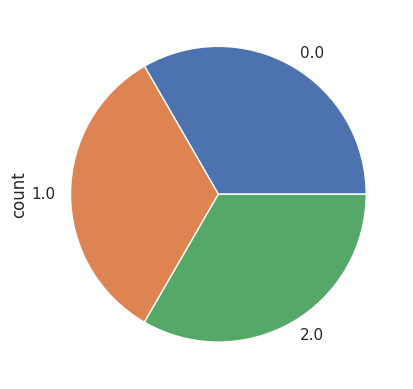

In [72]:
df.target.value_counts().plot(kind='pie')


In [73]:
data = df.copy()
target = data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
target.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.9, random_state=42, )

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(X_test) / len(data))
# Counts shoudl be the same -> especially when case is to find sth RARE -> use stratify
print(y_train.value_counts())
print(y_test.value_counts())

(135, 4)
(135,)
(15, 4)
(15,)
0.1
target
2.0    47
1.0    44
0.0    44
Name: count, dtype: int64
target
1.0    6
0.0    6
2.0    3
Name: count, dtype: int64


In [76]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [77]:
print(raw_data_copy['DESCR'])



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [78]:
data = raw_data_copy['data']
target = raw_data_copy['target']
all_data = np.c_[data, target]
all_data[:5]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12, 0.00],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09, 0.00],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09, 0.00],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17, 0.00],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.

In [79]:
print(f'{data[:5]}\n')
print(target[:5])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]
 [11.42 20.38 77.58 386.10 0.14 0.28 0.24 0.11 0.26 0.10 0.50 1.16 3.44 27.23 0.01 0.07 0.06 0.02 0.06 0.01 14.91 26.50 98.87 567.70 0.21 0.87 0.69 0.26 0.66 0.17]
 [20.29 14.34 135.10 1297.00 0.10 0.13 0.20 0.10 0.18 0.06 0.76 0.78 5.44 94.44 0.01 0.02 0.06 0.02 0.02 0.01 22.54 16.67 152.20 1575.00 0.14 0.20 0.40 0.16 0.24 0.08]]

[0 0 0 0 0]


In [80]:
df = pd.DataFrame(data=all_data, columns=list(raw_data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [81]:
df.target.value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

In [82]:
data = df.copy()
target = data.pop('target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=30, test_size=0.1, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(X_test) / len(data))
# Counts shoudl be the same -> especially when case is to find sth RARE -> use stratify
print(target.value_counts() / len(target))
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))


(512, 30)
(512,)
(57, 30)
(57,)
0.10017574692442882
target
1.0    0.627417
0.0    0.372583
Name: count, dtype: float64
target
1.0    0.626953
0.0    0.373047
Name: count, dtype: float64
target
1.0    0.631579
0.0    0.368421
Name: count, dtype: float64


# Linear Regression

y = w0 + w1x1
y_pred = w0 + w1x1
error = y_pred - y_true

problem of linear regression ->problem of  quadrate equations optimization

R^2, R^3, R^4 ....

###  Wymagania
* liniowa zaleznosc
* rozklad normalny
* wariancja reszt
brak wspoliniowosci predyktorow (usuwanie za pomoca dummies)

Rownanie normalne

(426, 30)
(426,)
(143, 30)
(15,)
0.2513181019332162
target
1.0    0.627417
0.0    0.372583
Name: count, dtype: float64
target
1.0    0.607981
0.0    0.392019
Name: count, dtype: float64
target
1.0    0.4
0.0    0.4
2.0    0.2
Name: count, dtype: float64
